In [1]:
import numpy as np
def get_ranks(df,partition,metric):
    df = df[df["partition"]==partition]
    df = df.sort_values(metric)
    df["rank_"+metric] = np.arange(len(df))
    return df
def get_total_rank(df,partition,metrics = ["wmape","dice","dpeaks"]):
    for metric in metrics:
        df = get_ranks(df,partition,metric)
    df["total_rank"] = df["rank_wmape"] + df["rank_dice"] + df["rank_dpeaks"]
    df = df.sort_values("total_rank")
    return df
    

In [2]:
def get_normalized(df,metric,partition=None):
    if partition:
        df = df[df["partition"]==partition].copy()
    else:
        df = df.copy()
    df["normalized_"+metric] = (df[metric] - df[metric].min())/(df[metric].max()-df[metric].min())
    return df
def get_total_normalized(df,partition=None,metrics = ["wmape","dice","dpeaks"]):
    for metric in metrics:
        df = get_normalized(df,metric,partition)
    df["total_normalized"] = df["normalized_wmape"] + df["normalized_dice"] + df["normalized_dpeaks"]
    df = df.sort_values("total_normalized")
    return df

In [17]:
import pandas as pd
df = pd.read_csv("logs.csv")
get_total_normalized(df[df["exp"]!="atunception_mae_magandorgraderr_lr"])

,exp,partition,wmape,dice,dpeaks,loss,normalized_wmape,normalized_dice,normalized_dpeaks,total_normalized
22,unet_mae_magandorgraderr_lr_totalpartition_bug...,4,1.41,0.0383,28.1,0.00421,0.000000,0.000000,0.000000,0.000000
13,unet_mae_magandorgraderr_lr,5,1.51,0.0433,33.0,0.00460,0.045455,0.041425,0.078526,0.165405
14,unet_mae_magandorgraderr_lr,6,1.51,0.0430,33.6,0.00451,0.045455,0.038940,0.088141,0.172535
12,unet_mae_magandorgraderr_lr,4,1.55,0.0433,33.5,0.00459,0.063636,0.041425,0.086538,0.191600
1,unet_mae_magandor_lr,3,1.85,0.0492,34.6,0.00542,0.200000,0.090307,0.104167,0.394473
21,unet_mae_magandorgraderr_lr_totalpartition,3,1.77,0.0499,38.4,0.00553,0.163636,0.096106,0.165064,0.424807
7,atunet_mae_magandorgraderr_lr,4,1.61,0.0479,45.8,0.00502,0.090909,0.079536,0.283654,0.454099
0,unet_mae_magandor_lr,4,1.90,0.0498,38.6,0.00551,0.222727,0.095278,0.168269,0.486274
25,unet_mae_magandorgrad_lr_totalpartition_autoca...,2,1.82,0.0536,39.0,0.00555,0.186364,0.126761,0.174679,0.487804
8,atunet_mae_magandorgraderr_lr,5,1.86,0.0475,42.7,0.00547,0.204545,0.076222,0.233974,0.514742


model1.coef_ [[320.56465047]]
model1.intercept_ 0.0
model2.coef_ [[10.82973927]]
model2.intercept_ 0.0


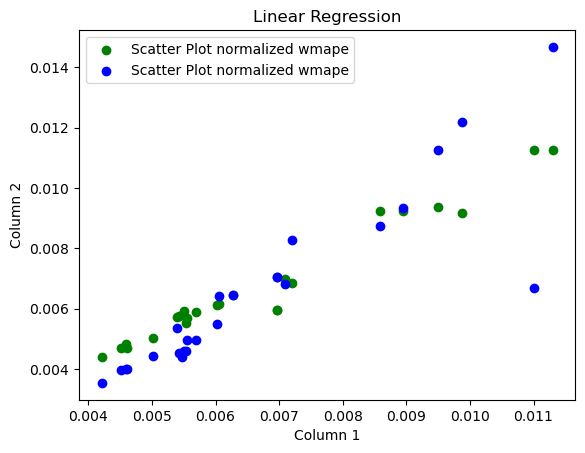

In [38]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
df = df[df["exp"]!="atunception_mae_magandorgraderr_lr"]
X = df["loss"].values.reshape(-1, 1)
y1 = df["wmape"].values.reshape(-1, 1)
y2 = df["dice"].values.reshape(-1, 1)

model1 = LinearRegression(fit_intercept=False).fit(X,y1)
model1.fit(X, y1)
y1_pred = model1.predict(X)


model2 = LinearRegression(fit_intercept=False).fit(X,y2)
model2.fit(X, y2)
y2_pred = model2.predict(X)
print("model1.coef_",model1.coef_)
print("model1.intercept_",model1.intercept_)
print("model2.coef_",model2.coef_)
print("model2.intercept_",model2.intercept_)
# Fit the model to the data


# Get the predicted values
#plt.scatter(X, y1, color='blue', label='Scatter Plot wmape') 
plt.scatter(X, (y1 - model1.intercept_)/model1.coef_[0][0], color='green', label='Scatter Plot normalized wmape') 
#plt.plot(X, y1_pred, color='red', label='Regression Line wmape')

#plt.scatter(X, y2, color='blue', label='Scatter Plot dice') 
plt.scatter(X, (y2- model2.intercept_)/model2.coef_[0][0], color='blue', label='Scatter Plot normalized wmape') 
#plt.plot(X, y2_pred, color='red', label='Regression Line dice')
plt.xlabel('Column 1')
plt.ylabel('Column 2')
plt.title('Linear Regression')
plt.legend()
plt.show()

array([306.14245382])

In [1]:
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
import torch

In [78]:
model_state_dict = torch.load("../experimentos/unet_mae_magandorgraderr_lr/models/best_model_partition_4.pth",map_location="cpu")

/tmp/ipykernel_101218/220033433.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_state_dict = torch.load("../experimentos/unet_mae_magandorgraderr_lr/models/best_mo

In [79]:
w = model_state_dict["encoder1.conv.0.weight"]

In [80]:
import numpy as np
# Assuming `weights` is a numpy array of shape (channels_out, channels_in, kernel_height, kernel_width)
# weights.shape -> (64, 9, kh, kw)

# Compute the sum of absolute values of weights for each input channel
channel_importance = np.sum(np.abs(w.detach().numpy()), axis=(0, 2, 3))

# Normalize or sort to identify the most significant channels
normalized_importance = channel_importance / np.sum(channel_importance)
print("Channel importance (normalized):", normalized_importance)


Channel importance (normalized): [0.10824206 0.10983228 0.10713389 0.11062915 0.1092234  0.11005307
 0.11367284 0.11272318 0.11849003]


In [82]:
(channel_importance.min()-channel_importance.max())/ np.sum(channel_importance)

np.float32(-0.011356148)

In [ ]:
from common.purrfect.dataset import 